In [49]:
from neko.core.network import Network
from neko._visual.visualize_network import NetworkVisualizer
from neko._inputs.resources import Resources
from neko._annotations.gene_ontology import Ontology
import omnipath as op
import pandas as pd

In [50]:
data_folder = "../data/"

figures_folder = "../Figures/"

sif_output = "../sif_files/"

In [51]:
Huri = pd.read_csv('../data/HURI_full_data_trasnlated.csv', usecols=["source_UniProtKB-Swiss-Prot", "target_UniProtKB-Swiss-Prot"])

In [52]:
Huri

,source_UniProtKB-Swiss-Prot,target_UniProtKB-Swiss-Prot
0,Q9H2S6,Q9NPE6
1,Q9H2S6,Q9BXK5
2,Q9H2S6,O60238
3,Q9H2S6,P20138
4,Q9H2S6,Q9UM44
...,...,...
75885,O14737,Q92993
75886,P04792,O43707
75887,P04792,Q9NPF5
75888,P31749,Q12778


In [53]:
resources = Resources()

In [54]:
mapping = {"source_UniProtKB-Swiss-Prot": "source", "target_UniProtKB-Swiss-Prot": "target"}
resources.add_database(Huri, column_mapping=mapping,  reset_index=True)

In [55]:
group3_list = ['MYC',
 'SMARCA4',
 'GFI1B',
 'ATM',
 'PTEN',
 'KBTBD4',
 'CRX',
 'HLX',
 'IRX6',
 'LHX9',
 'NKX3-2']

In [56]:
group3_net = Network(group3_list, resources = resources.interactions)

Error: node KBTBD4 is not present in the resources database


In [57]:
group3_net.nodes

,Genesymbol,Uniprot,Type
0,MYC,P01106,NaN
1,SMARCA4,P51532,NaN
2,GFI1B,Q5VTD9,NaN
3,ATM,Q13315,NaN
4,PTEN,P60484,NaN
5,CRX,O43186,NaN
6,HLX,Q14774,NaN
7,IRX6,P78412,NaN
8,LHX9,Q9NQ69,NaN
9,NKX3-2,P78367,NaN


In [58]:
%%time
group3_net.complete_connection(maxlen=4, algorithm="dfs", only_signed=False, connect_with_bias=False, consensus=False)

CPU times: user 2.09 s, sys: 626 µs, total: 2.09 s
Wall time: 2.09 s


In [59]:
group3_net.edges

,source,target,Type,Effect,References
0,P01106,Q9Y2X9,None,undefined,;
1,Q9Y2X9,P40763,None,undefined,;
2,P40763,Q05397,None,undefined,;
3,Q05397,P60484,None,undefined,;
4,O43186,Q8IYB5,None,undefined,;
5,Q8IYB5,Q99471,None,undefined,;
6,Q99471,P01106,None,undefined,;
7,O43186,Q92734,None,undefined,;
8,Q92734,Q99471,None,undefined,;
9,O43186,P42773,None,undefined,;


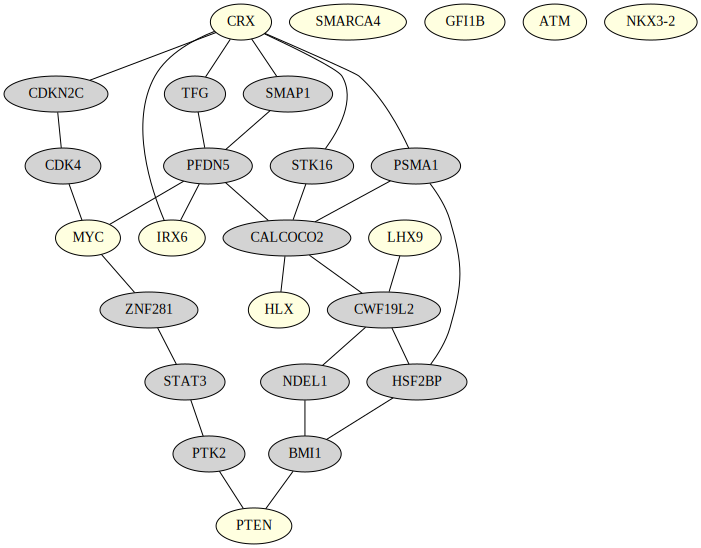

In [60]:
group3_visualizer = NetworkVisualizer(group3_net,color_by='effect', noi=True)
output = figures_folder + "group3_HURI"
group3_visualizer.render(output_file=output)

In [61]:
from neko._outputs.exports import Exports

In [62]:
export = Exports(group3_net)

In [63]:
folder = sif_output + "group3_HURI.sif"

In [64]:
export.export_sif(folder)